<a href="https://colab.research.google.com/github/duchaba/Data-Augmentation-with-Python/blob/main/data_augmentation_with_python_chapter_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Augmentation with Python, Chapter 5

# 🌻 Welcome to Chapter 4, "Image Augmentation for Segmentation"

In this chapter, you will learn about Text augmentation and how to code the methods in Python. In particular, the topics are as follows: 

- Character augmenting 

- Word augmenting 

- Sentence and flow augmenting 

- Text augmentation libraries 

- Reinforce learning through Python code 

## Set up: Bring back Pluto


### ✋ STOP: Pull Method

- There are two methods to bring back Pluto.

1. Clone from GitHut (or update by doing "git pull if you have clone it before)

2. Or retrieve from an URL. The URL can be the GitHub URL or an URL the you store your Pluto python file from the first lesson.

- Do one, but not both.

### GitHub Clone

In [ ]:
# git version should be 2.17.1 or higher
!git --version

git version 2.17.1


In [ ]:
#url = 'https://github.com/PacktPublishing/Data-Augmentation-with-Python'
url = 'https://github.com/duchaba/Data-Augmentation-with-Python'
!git clone {url}

Cloning into 'Data-Augmentation-with-Python'...
remote: Enumerating objects: 237, done.
remote: Counting objects: 100% (131/131), done.
remote: Compressing objects: 100% (109/109), done.
remote: Total 237 (delta 52), reused 52 (delta 20), pack-reused 106
Receiving objects: 100% (237/237), 259.79 MiB | 18.17 MiB/s, done.
Resolving deltas: 100% (101/101), done.


### Fetch file from URL (Optional)

- Uncommend the below 2 code cells if you want to use URL and not Git Clone

In [ ]:
# import requests
# #
# def fetch_file(url, dst):
#   downloaded_obj = requests.get(url)
#   with open(dst, "wb") as file:
#     file.write(downloaded_obj.content)
#   return

In [ ]:
# url = ''
# dst = 'pluto_chapter_1.py'
# fetch_file(url,dst)

### Pluto

- Instantiate up Pluto, aka. "Pluto, wake up!"

In [ ]:
#load and run the pluto chapter 1 Python code.
pluto_file = 'Data-Augmentation-with-Python/pluto/pluto_chapter_2.py'
%run {pluto_file}

---------------------------- : ----------------------------
            Hello from class : <class '__main__.PacktDataAug'> Class: PacktDataAug
                   Code name : Pluto
                   Author is : Duc Haba
---------------------------- : ----------------------------


- Double check on the server environments

In [ ]:
pluto.say_sys_info()

---------------------------- : ----------------------------
                 System time : 2022/11/05 04:11
                    Platform : linux
     Pluto Version (Chapter) : 2.0
             Python (3.7.10) : actual: 3.7.15 (default, Oct 12 2022, 19:14:55) [GCC 7.5.0]
            PyTorch (1.11.0) : actual: 1.12.1+cu113
              Pandas (1.3.5) : actual: 1.3.5
                 PIL (9.0.0) : actual: 7.1.2
          Matplotlib (3.2.2) : actual: 3.2.2
                   CPU count : 2
                  *CPU speed : NOT available
---------------------------- : ----------------------------


In [ ]:
pluto_chapter_5 = 'Data-Augmentation-with-Python/pluto/pluto_chapter_5.py'
!cp {pluto_file} {pluto_chapter_5}

### ✋ STOP: Reinitalize Kaggle

- Install the following libraries, and import it on the Notebook.
- Follow by initialize Kaggle username, key and fetch methods.
- STOP: Update your Kaggle access username or key first.

In [ ]:
# -------------------- : --------------------
# READ ME
# Chapter 2 begin:
# Install the following libraries, and import it on the Notebook.
# Follow by initialize Kaggle username, key and fetch methods.
# STOP: Update your Kaggle access username or key first.
# -------------------- : --------------------

!pip install opendatasets --upgrade
import opendatasets
print("\nrequired version 0.1.22 or higher: ", opendatasets.__version__)

!pip install pyspellchecker 
import spellchecker
print("\nRequired version 0.7+", spellchecker.__version__)

# STOP: Update your Kaggle access username or key first.
pluto.remember_kaggle_access_keys("duchaba", "0c737c90feacb5c56232b0d7c24e8664")
pluto._write_kaggle_credit()
import kaggle

@add_method(PacktDataAug)
def fetch_kaggle_comp_data(self,cname):
  #self._write_kaggle_credit()  # need to run only once.
  path = pathlib.Path(cname)
  kaggle.api.competition_download_cli(str(path))
  zipfile.ZipFile(f'{path}.zip').extractall(path)
  return

@add_method(PacktDataAug)
def fetch_kaggle_dataset(self,url,dest="kaggle"):
  #self._write_kaggle_credit()    # need to run only once.
  opendatasets.download(url,data_dir=dest)
  return
# -------------------- : --------------------


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

required version 0.1.22 or higher:  0.1.22
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.5 MB 16.5 MB/s 

Required version 0.7+ 0.7.0


# Fetch Kaggle Data

## NetFlix

In [ ]:
%%time
url = 'https://www.kaggle.com/datasets/infamouscoder/dataset-netflix-shows'
pluto.fetch_kaggle_dataset(url)

100%|██████████| 1.34M/1.34M [00:00<00:00, 2.51MB/s]


CPU times: user 89.8 ms, sys: 18.3 ms, total: 108 ms
Wall time: 1.62 s


In [ ]:
f = 'kaggle/dataset-netflix-shows/netflix_titles.csv'
pluto.df_netflix_data = pluto.fetch_df(f)
pluto.df_netflix_data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [ ]:
pluto.print_batch_text(pluto.df_netflix_data)

,title,description
232,Wheel of Fortune,"Pat Sajak and Vanna White host one of TV's most popular, long-running game shows, where players spin a wheel for prizes and solve mystery phrases."
1686,Kevin Hart: Zero F**ks Given,"Kevin Hart serves up laughs and brick oven pizza from the comfort of his home, and dishes on male group chats, sex after 40 and life with COVID-19."
967,Headspace Guide to Sleep,"Learn how to sleep better with Headspace. Each episode unpacks misconceptions, offers friendly tips and concludes with a guided wind-down."
6191,At All Costs,This revealing documentary explores how the high-stakes world of Amateur Athletic Union basketball has professionalized youth sports in America.
5717,Dieter Nuhr: Nuhr in Berlin,"The cerebral and popular German cabaret comic expounds his theories on gender norms, primal instincts and a decidedly gastrointestinal Big Bang."
4305,Inside the Real Narcos,"Exposing a rarely seen perspective on the drug wars, ex-Special Forces commando Jason Fox interviews dangerous traffickers and cartel members."
3760,Upin & Ipin,Two mischievous yet lovable five-year-old twins and their friends enjoy daily life and new discoveries with the residents of their Malaysian village.
8767,XXX: State of the Union,"In this action-packed follow-up to XXX, U.S. intelligence officer Augustus Gibbons must thwart a massive conspiracy to overthrow the government."
7631,Nymphomaniac: Volume II,The second half of Lars von Trier's epic follows Joe as her reignited sex addiction destroys her family and thrusts her toward a surprising new trade.
491,Home Again,"A newly single mom takes in three young male filmmakers as boarders, but her estranged husband returns to complicate her new, unconventional life."


In [ ]:
pluto.count_word(pluto.df_netflix_data)
pluto.df_netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,wordc
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",27
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",27
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,27
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",24
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24


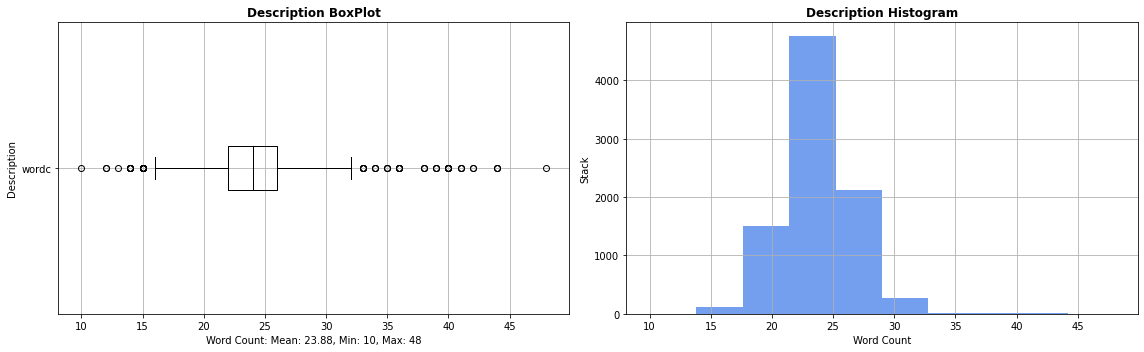

In [ ]:
pluto.draw_word_count(pluto.df_netflix_data)

In [ ]:
!pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# %%writefile -a {pluto_chapter_5}

pluto.version = 5.0
import missingno
@add_method(PacktDataAug)
def draw_text_null_data(self, df, color=(0.3,0.36,0.44)):
  canvas, pic = matplotlib.pyplot.subplots(1, 1, figsize=(16, 6))
  missingno.matrix(df,color=color,ax=pic)
  pic.set_title('Missing Data (Null Value)')
  pic.set_xlabel('Solid is has data. White line is missing/null data.')
  canvas.tight_layout()
  self._drop_image(canvas)
  canvas.show()
  return

/usr/local/lib/python3.7/dist-packages/missingno/missingno.py:62: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  "Plotting a sparkline on an existing axis is not currently supported. "


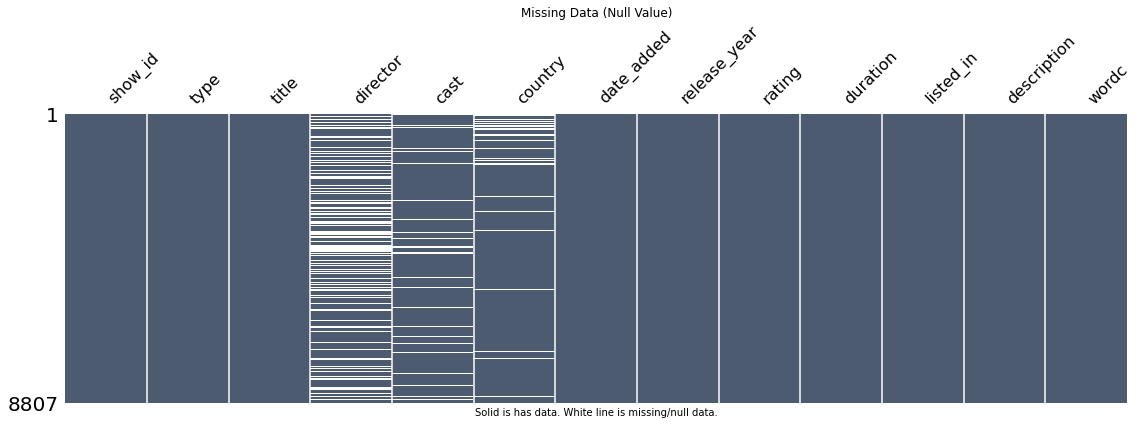

In [ ]:
pluto.draw_text_null_data(pluto.df_netflix_data)

In [ ]:
!pip install nltk
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# %%writefile -a {pluto_chapter_5}

import nltk
import wordcloud

In [ ]:
print('Nltk version 3.7: actual: ', nltk.__version__)
print('WordCloud version 1.8.2.2: actual: ', wordcloud.__version__)

Nltk version 3.7: actual:  3.7
WordCloud version 1.8.2.2: actual:  1.8.2.2


In [ ]:
# %%writefile -a {pluto_chapter_5}

import re
@add_method(PacktDataAug)
def _draw_image_wordcloud(self, words_str, xignore_words='cat', title='Word Cloud:'):
  canvas, pic = matplotlib.pyplot.subplots(1, 1, figsize=(16, 8))
  img = wordcloud.WordCloud(width = 1600, 
    height = 800, 
    background_color ='white',
    stopwords = xignore_words, 
    min_font_size = 10).generate(words_str) 
  pic.imshow(img)
  pic.set_title(title)
  pic.set_xlabel(f'Approximate Words: {int(len(words_str) / 5)}')
  pic.tick_params(left = False, right = False, labelleft = False,
    labelbottom = False, bottom = False)
  canvas.tight_layout()
  self._drop_image(canvas)
  canvas.show()
  return
  #
@add_method(PacktDataAug)
def draw_text_wordcloud(self, df_1column, xignore_words='cat', title='Word Cloud:'):
  orig = df_1column.str.cat()
  clean = re.sub('[^A-Za-z0-9 ]+', '', orig)
  self._draw_image_wordcloud(clean, xignore_words=xignore_words,title=title)
  return

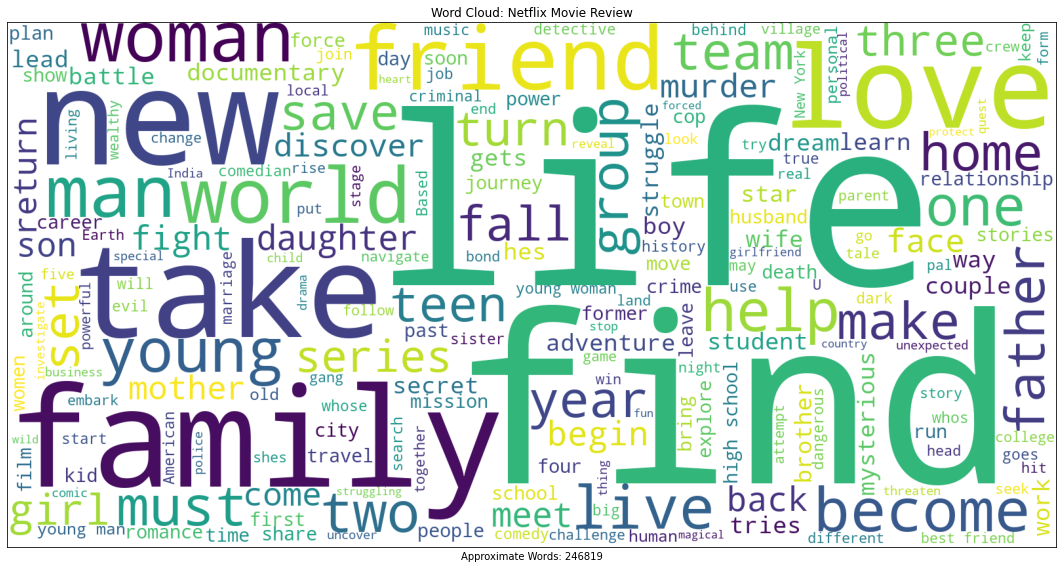

In [ ]:
pluto.draw_text_wordcloud(pluto.df_netflix_data.description, 
  xignore_words=wordcloud.STOPWORDS, 
  title='Word Cloud: Netflix Movie Review')

In [ ]:
# x = ' '.join(wordcloud.STOPWORDS)
# pluto._draw_image_wordcloud(x,title='Word Cloud: StopWords')

## Twitter

In [ ]:
@add_method(PacktDataAug)
def fetch_df(self, csv):
  df = pandas.read_csv(csv, encoding='latin-1')
  return df

In [ ]:
# 
%%time
#url = 'https://www.kaggle.com/datasets/datatattle/covid-19-nlp-text-classification'
url = 'https://www.kaggle.com/datasets/mayurdalvi/twitter-sentiments-analysis-nlp'
pluto.fetch_kaggle_dataset(url)

100%|██████████| 1.23M/1.23M [00:00<00:00, 2.37MB/s]


CPU times: user 90.5 ms, sys: 18.5 ms, total: 109 ms
Wall time: 1.25 s


In [ ]:
# remove white space in directory and filename
# run this until no error/output
f = 'kaggle/twitter-sentiments-analysis-nlp'
#!find {f} -name "* *" -type d | rename 's/ /_/g'
!find {f} -name "* *" -type f | rename 's/ /_/g'

In [ ]:
f = 'kaggle/twitter-sentiments-analysis-nlp/Twitter_Sentiments.csv'
pluto.df_twitter_data = pluto.fetch_df(f)
pluto.df_twitter_data.head(3)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty


In [ ]:
pluto.print_batch_text(pluto.df_twitter_data,cols=['label', 'tweet'])

,label,tweet
19680,0,we all deserve a happy and peaceful life! why not give yourself a chance to do so! Ã°ÂÂÂ #happinesseverywhere #positivethinking
5088,1,@user stop perpetuating false racism and leftist subversive politically correct propaganda. america is not racist! wÃ¢ÂÂ¦
26122,0,"good morning! let us all have a #healthy #detox day today! remember, ""our issues live inÃ¢ÂÂ¦"
26716,0,our baby was due in six months. then my girlfriend said she'd met another man beautifully written
7027,0,i am thankful for computers. #thankful #positive
6332,1,"@user please don't forget to use the word ! that is what ""binds"" these men. we can never ignore or excuse thatÃ¢ÂÂ¦"
9449,0,@user lazy saturday packing for my trip to melbourne tomorrow!!!! #melbourne #sex #tweety
24452,0,save $$ no logins x brokers #me #change #memes #love #education #university
28356,0,i am thankful for my teachers. #thankful #positive
31875,0,@user my beautiful princess mummy #muma #bestfriend #beaut #smiley


In [ ]:
!pip install filter-profanity
import profanity

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for filter-profanity: filename=filter_profanity-1.0.9-py3-none-any.whl size=5222 sha256=4926a1938d68dca042a83115fc4bce7faa7d3907ef6c2c1508dca29d05c61142
  Stored in directory: /root/.cache/pip/wheels/45/db/dc/f86ac2b1cbc781edcd2e42b8a0d891ab64d109cd1648821340
Successfully built filter-profanity


In [ ]:
# clean up
import re
#
@add_method(PacktDataAug)
def _clean_text(self,x):
  return (re.sub('[^A-Za-z0-9 .,!?#@]+', '', str(x)))
#
@add_method(PacktDataAug)
def _clean_bad_word(self,x):
  return (profanity.censor_profanity(x, ''))
#
@add_method(PacktDataAug)
def clean_text(self, df):
  df['clean_tweet'] = df.tweet.apply(self._clean_text)
  df['clean_tweet'] = df['clean_tweet'].apply(self._clean_bad_word)
  return df

In [ ]:
%%time
pluto.clean_text(pluto.df_twitter_data)
pluto.df_twitter_data.head()

CPU times: user 2.5 s, sys: 18.1 ms, total: 2.52 s
Wall time: 2.68 s


,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,@user when a father is dysfunctional and is so...
1,2,0,@user @user thanks for #lyft credit i can't us...,@user @user thanks for #lyft credit i cant use...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur!!!
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


In [ ]:
pluto.print_batch_text(pluto.df_twitter_data, cols=['label', 'clean_tweet'])

,label,clean_tweet
8156,0,what is wrong in the world today? #timeforchange #paulpowell #paullawyerlasvegas #lasvegasinjurylawyer #vegas
29755,0,when u #realize that ur going to the #country your #family #emigrated from and uv never been and u are just beyond #colombia #2wks
7519,0,@user the death of a dream is the day that you stop believing in the work it takes to get there. #dream #quoteoftheday
3956,0,meetings with the big boss do not come any better than that #greeneking #oei #mk #smashedit
16993,0,#film #like #smile #hasselblad # # # # #square #imdeaf
27280,0,@user thank you lmc family #retreat #lmc #giveback #thankful
22033,0,#thinkbigsundaywithmarsha! lets spread some #leadership quotes to like minded #people for a to 300k #people sunday #staup
25790,0,@user only 43 days until #estuaryfringefestival 2016 kicks off! whos ? #southend #as #music #culture @user
27998,0,amp u cant deny that ppls attitudes change on how u look amp what u wear or whom youre with ! thats why ppl change! to get attention
17979,0,@user cant wait to join the pay next week. english media like @user desperate to show negatives and destroy the truth.


In [ ]:
# double check on clean tweets
print('clean: ', pluto.df_twitter_data.clean_tweet[13538], ' : original: ', 
  pluto.df_twitter_data.tweet[13538], ': label: ', pluto.df_twitter_data.label[13538])

clean:  black girl  teen virgin  pictures  : original:   black girl porn teen virgin sex pictures  : label:  1


In [ ]:
# double check on clean tweets
with pandas.option_context("display.max_colwidth", None):
  display(pluto.df_twitter_data[pluto.df_twitter_data.label == 1].sample(10))

,id,label,tweet,clean_tweet
30301,30302,1,chomsky: israeli #apaheid much worse than south africa #israel #internationallaw #occupation #bds,chomsky israeli #apaheid much worse than south africa #israel #internationallaw #occupation #bds
25763,25764,1,the legacy of a @user crony. vote passes calling for @user to resign or get the boot!,the legacy of a @user crony. vote passes calling for @user to resign or get the boot!
21964,21965,1,i hope the guy won't say how come only trump gets to speak his mind Ã°ÂÂÂ­..people! enough with the pc already #sarcasmÃ¢ÂÂ¦,i hope the guy wont say how come only trump gets to speak his mind ..people! enough with the pc already #sarcasm
27577,27578,1,@user you might be a libtard if... #libtard #sjw #liberal #politics,@user you might be a libtard if... #libtard #sjw #liberal #politics
22417,22418,1,"#sikh #temple vandalised in in #calgary, #wso condemns act","#sikh #temple vandalised in in #calgary, #wso condemns act"
4186,4187,1,excellent idea! dig deep &amp; hang 'em high! #treason #aidingenemies #fraud #coverups #benghazi #extoion17 Ã¢ÂÂ¦,excellent idea! dig deep amp hang em high! #treason #aidingenemies #fraud #coverups #benghazi #extoion17
21477,21478,1,"no,we can see they have been instrumental in promoting false narrative &amp; abetting divisive blm agenda.","no,we can see they have been instrumental in promoting false narrative amp abetting divisive blm agenda."
28345,28346,1,@user @user @user @user must be heabreaking for #blacks within @user to find they're helpless againstÃ¢ÂÂ¦,@user @user @user @user must be heabreaking for #blacks within @user to find theyre helpless against
10735,10736,1,this is what trumpÃ¢ÂÂs ny campaign chair had to say about the sitting president of the united states and the first laÃ¢ÂÂ¦,this is what trumps ny campaign chair had to say about the sitting president of the united states and the first la
1942,1943,1,chick gets fucked nude superhero,chick gets nude superhero


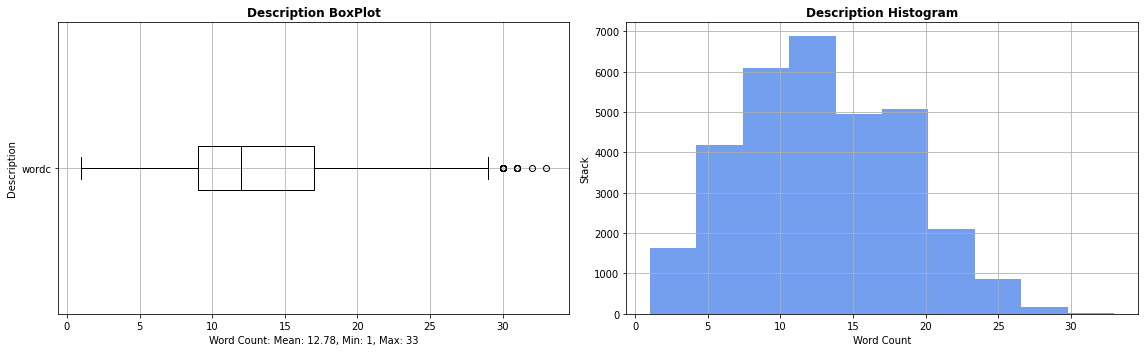

In [ ]:
pluto.count_word(pluto.df_twitter_data,col_dest='clean_tweet')
pluto.draw_word_count(pluto.df_twitter_data)

/usr/local/lib/python3.7/dist-packages/missingno/missingno.py:62: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  "Plotting a sparkline on an existing axis is not currently supported. "


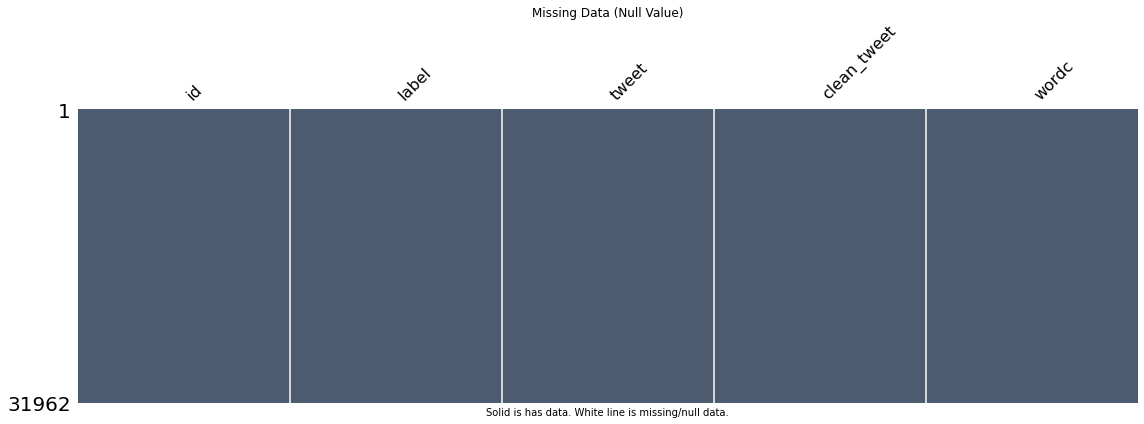

In [ ]:
pluto.draw_text_null_data(pluto.df_twitter_data)

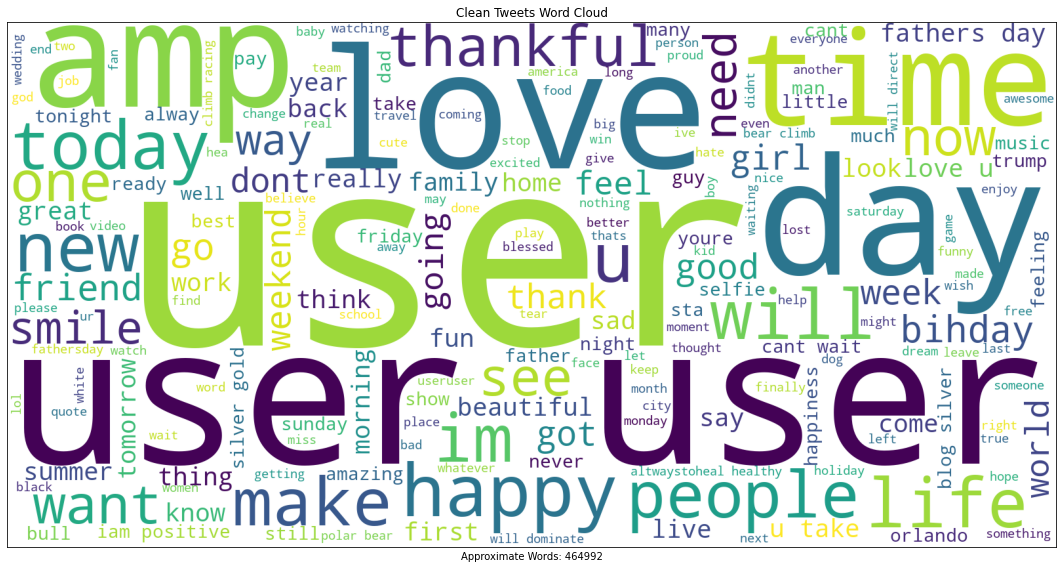

In [ ]:
pluto.draw_text_wordcloud(pluto.df_twitter_data.clean_tweet,
  xignore_words=wordcloud.STOPWORDS,
  title='Clean Tweets Word Cloud')

In [ ]:
pluto.fname_id

6

# Character Augmenter<a class="anchor" id="chara_aug">

Augmenting data in character level. Possible scenarios include image to text and chatbot. During recognizing text from image, we need to optical character recognition (OCR) model to achieve it but OCR introduces some errors such as recognizing "o" and "0". `OCRAug` simulate these errors to perform the data augmentation. For chatbot, we still have typo even though most of application comes with word correction. Therefore, `KeyboardAug` is introduced to simulate this kind of errors.

In [ ]:
!pip install nlpaug

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 410 kB 12.5 MB/s 


In [ ]:
import nlpaug
import nlpaug.augmenter
import nlpaug.augmenter.char
import nlpaug.augmenter.word
print('version 1.1.11, actual: ',nlpaug.__version__)

version 1.1.11, actual:  1.1.11


In [ ]:
pluto.orig_text = 'It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.'

In [ ]:
# %%writefile -a {pluto_chapter_2}

@add_method(PacktDataAug)
def _print_aug_batch(self, df, aug_func, col_dest="description",bsize=3, aug_name='Augmented'):
  col_name = [aug_name, 'Original']
  aug = aug_func.augment(self.orig_text, n=1)
  data = [[aug[0], self.orig_text]]
  df_aug = pandas.DataFrame(data, columns=col_name)
  orig = df[col_dest].sample(bsize)
  for tx in orig:
    aug = aug_func.augment(tx, n=1)
    data = [[aug[0], tx]]
    t = pandas.DataFrame(data, columns=col_name)
    df_aug = df_aug.append(t, ignore_index=True)
  #
  with pandas.option_context("display.max_colwidth", None):
    display(df_aug.head(bsize+1))
  return

## OCR augmenting

In [ ]:
# %%writefile -a {pluto_chapter_5}

@add_method(PacktDataAug)
def print_aug_ocr(self, df, col_dest="description",bsize=3, aug_name='Augmented'):
  aug_func = nlpaug.augmenter.char.OcrAug()
  self._print_aug_batch(df, aug_func,col_dest=col_dest,bsize=bsize, aug_name=aug_name)
  return

In [ ]:
pluto.print_aug_ocr(pluto.df_netflix_data, col_dest='description',aug_name='OCR Augment')

,OCR Augment,Original
0,1t was the 6e8t of times. It was the wok8t of times. It was the a9e 0f wisdom. It was the age of fuulishne88. It was the ep0ch of belief. It was the epoch of inckedo1ity.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,Hilary ' s plan tu hire a good - 1o0kin9 guy tu act as her boyfriend 6acrfikes when she 6rin9s him home for the holidays to tky and fool her fami1y.,Hilary's plan to hire a good-looking guy to act as her boyfriend backfires when she brings him home for the holidays to try and fool her family.
2,"1n 1921, nokse tkainee8 from Madrid ' s oppek class open a hospital in Melilla for Rif War 8u1diers, findin9 friendship and k0mance whi1e saving lives.","In 1921, nurse trainees from Madrid's upper class open a hospital in Melilla for Rif War soldiers, finding friendship and romance while saving lives."
3,"Set in the yeak 1402, this prequel follows Locian, the first werewolf to take human f0km, and chronicles the feud 6etween the vampike8 and the Lycans.","Set in the year 1402, this prequel follows Lucian, the first werewolf to take human form, and chronicles the feud between the vampires and the Lycans."


In [ ]:
pluto.print_aug_ocr(pluto.df_twitter_data, col_dest='clean_tweet',aug_name='OCR Augment')

,OCR Augment,Original
0,1t was the best of times. It was the wok8t of time8. It was the age of wisdom. It was the age 0f foolishness. It wa8 the epoch of belief. It was the epoch uf incredulity.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,happy world gin day to one and a11! # worldginday # fav0ukitece1e6katiun @ the r0ya1,happy world gin day to one and all! #worldginday #favouritecelebration @ the royal
2,# pizzadner # poknf0ud # faim # hungry # touchepasamonassiette,#pizzadner#pornfood#faim #hungry#touchepasamonassiette
3,you mi9ht be a 1i6takd if. .. # libtard # sjw # liberal # politics,you might be a libtard if... #libtard #sjw #liberal #politics


### scratch

In [ ]:
# import nlpaug.augmenter.char as nac
# import nlpaug.augmenter.word as naw
# import nlpaug.augmenter.sentence as nas
# import nlpaug.flow as nafc

# from nlpaug.util import Action

In [ ]:
# #text = 'The quick brown fox jumps over the lazy dog .'
# text = 'It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.'
# print(text)

## Keyboard Augmenter<a class="anchor" id="keyboard_aug"></a>

##### Substitute character by keyboard distance

In [ ]:
# %%writefile -a {pluto_chapter_5}

@add_method(PacktDataAug)
def print_aug_keyboard(self, df, col_dest="description",bsize=3, aug_name='Keyboard Augment'):
  aug_func = nlpaug.augmenter.char.KeyboardAug()
  self._print_aug_batch(df, aug_func,col_dest=col_dest,bsize=bsize, aug_name=aug_name)
  return

In [ ]:
pluto.print_aug_keyboard(pluto.df_netflix_data, col_dest='description',aug_name='Keyboard Augment')

,Keyboard Augment,Original
0,It was the Fext of tLHes. It was the wl3st of t7meC. It was the age of aisdlm. It was the age of BooKiChnesQ. It was the wpocN of NSlief. It was the #9och of iMcreWhlit6.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,"Elite XtTl3tes and insiders feGlech on the ParaPyHp9c Fakes and examine how yh4y impact a g<ibal undeGstXnFiJg of disability, diversity and edcel/encs.","Elite athletes and insiders reflect on the Paralympic Games and examine how they impact a global understanding of disability, diversity and excellence."
2,"When S^p4rmsn and the 8theF UJstiDe ,eagu# su9eryerPez start wisap)ear7nT, it ' s up to Batman to unravel the capRt and saBR the day.","When Superman and the other Justice League superheroes start disappearing, it's up to Batman to unravel the caper and save the day."
3,"A Bihari moRranh rubE a suDcdsZful serFJDe to help xoullea eIole, until the daughter of his f)rmeF boss stirs the pot.","A Bihari migrant runs a successful service to help couples elope, until the daughter of his former boss stirs the pot."


In [ ]:
pluto.print_aug_keyboard(pluto.df_twitter_data, col_dest='clean_tweet',aug_name='Keyboard Augment')

,Keyboard Augment,Original
0,It was the b#s$ of tim3d. It was the word6 of tunes. It was the age of wlsXom. It was the age of fioliEhGesD. It was the Fp8ch of beOi@f. It was the eLocG of ibcrFdul(tH.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,"# nowplaying highflouve40 # hFE0 de @ Ts4r @ user n7 thLa see,!",#nowplaying highclouds30 #hc30 de @user @user n7 this week!
2,@ user # now # Iice # music # fun # ensrgG # pXnGQmazis9u # QabanOC # tXmya @ aF#o (ftixial,@user #now #live #music #fun #energy #pantamazisou #sabanis #tamta @ acro official
3,found a new favorite zohg # sGo@emwhatylur#mZReif # baVkstrweHGo%s # pwrfevthqrmLn%,found a new favorite song #showemwhatyouremadeof #backstreetboys #perfectharmony


## Random Augmenter<a class="anchor" id="random_aug"></a>

##### Insert character randomly

In [ ]:
# %%writefile -a {pluto_chapter_5}

@add_method(PacktDataAug)
def print_aug_char_random(self, df, action='insert', col_dest="description",bsize=3, aug_name='Augment'):
  aug_func = nlpaug.augmenter.char.RandomCharAug(action=action)
  self._print_aug_batch(df, aug_func,col_dest=col_dest,bsize=bsize, aug_name=aug_name)
  return

In [ ]:
pluto.print_aug_char_random(pluto.df_netflix_data, action='insert', col_dest='description', aug_name='Random Insert Augment')

,Random Insert Augment,Original
0,It was the bemsqt of atim3es. It was the Zwo5rst of *tQimes. It was the age of wIisdo*m. It was the age of f(oolisghne7sPs. It was the ekpoSch of bhelYief. It was the e!poOch of i9ncrCevdulitzy.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,"Bad ta!totoZos walk in. Great tattoos whal^k out. Top aar9tuists transform tattoo disasters &iqnto stunning Kcov8er - ups, wTitOh designs chovsejn by fclieFnAts ' l%ojved ones.","Bad tattoos walk in. Great tattoos walk out. Top artists transform tattoo disasters into stunning cover-ups, with designs chosen by clients' loved ones."
2,"Yea!rEs after the death of their o7nlCy child and subsequent divorce, a couple discovers stqhat t2hHeir son ' s gYhosmt contmi5n#ues to inhaqbwirt t!heoir fporXmer home.","Years after the death of their only child and subsequent divorce, a couple discovers that their son's ghost continues to inhabit their former home."
3,"At onFc5e Uspookoy and grisly, this thrilUlXesr follows a woman ' s quest to fkipnd the qtruteh behind claims her RmoSther killed EthreWe people adurin9g an exozrciksVm.","At once spooky and grisly, this thriller follows a woman's quest to find the truth behind claims her mother killed three people during an exorcism."


In [ ]:
pluto.print_aug_char_random(pluto.df_netflix_data, action='delete', col_dest='description', aug_name='Random Delete Augment')

,Random Delete Augment,Original
0,It was the st of ims. It was the ost of ies. It was the age of wiom. It was the age of folihes. It was the poh of lief. It was the och of ncedult.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,"Undcove cameras xpse public floggings, exeuios and otr brutality in aud Arabia, and itodue those risking hir own lives for cane.","Undercover cameras expose public floggings, executions and other brutality in Saudi Arabia, and introduce those risking their own lives for change."
2,"In ti biial "" Hangover "" spo, the aotes aken to find ess is missing and must piece tgeer ents of the previous night ' s wd Last uppe.","In this biblical ""Hangover"" spoof, the apostles awaken to find Jesus is missing and must piece together events of the previous night's wild Last Supper."
3,"oben is trying to be a gd friend, fllw the faith and ise his teng iste. Yet his as â   and eeray ie â   mlicaes matters.","Mobeen is trying to be a good friend, follow the faith and raise his teenage sister. Yet his past â and everyday life â complicates matters."


In [ ]:
pluto.print_aug_char_random(pluto.df_netflix_data, action='substitute', col_dest='description', aug_name='Random Substitute Augment')

,Random Substitute Augment,Original
0,It was the btEt of time*. It was the w&bst of tiJZs. It was the age of hisdov. It was the age of foulxshBeZs. It was the eeocO of beBiJf. It was the 0pocD of 8n+redulJtS.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,"When a caniw@ con ar0is# becomes an angel, he (neaks bcDk to EFrsh and crosses $ath( with an orphan Hiul who can XpeXk to Pniy9ls.","When a canine con artist becomes an angel, he sneaks back to Earth and crosses paths with an orphan girl who can speak to animals."
2,"noiD uo^r DrcamWb4ks friends for theHj Joar holiday ssMciams, featuring Shrek and Donkey, Hiccup and Toothless, and the wacky TniQaEs 2Eom Madagascar.","Join your DreamWorks friends for these four holiday specials, featuring Shrek and Donkey, Hiccup and Toothless, and the wacky animals from Madagascar."
3,"DMqverc, (Wnag+rs and tra* 9wQers live life in the fast Dahe â   both on and off the track â   Wurin1 one cYtthrYae seasyn of MLrIula 1 reci_g.","Drivers, managers and team owners live life in the fast lane â both on and off the track â during one cutthroat season of Formula 1 racing."


In [ ]:
pluto.print_aug_char_random(pluto.df_netflix_data, action='swap', col_dest='description', aug_name='Random Swap Augment')

,Random Swap Augment,Original
0,It was the best of itmse. It was the wostr of items. It was the age of wsiodm. It was the age of ofoilshenss. It was the eophc of ebleif. It was the ephoc of incredulity.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,"Hwne the Umpptes learn that their eblvode thetaer is lstaed for edomiltion, the gnga reunite to raise the $ 10 imlloni they need to asev it.","When the Muppets learn that their beloved theater is slated for demolition, the gang reunite to raise the $10 million they need to save it."
2,A sensitive Inau tnee searches for a spiritual conencitno whit his ercetnyl deceased dad while anvitgaing his indigenous identity in a hacnigng owrdl.,A sensitive Ainu teen searches for a spiritual connection with his recently deceased dad while navigating his indigenous identity in a changing world.
3,"Faetr a ifev - eyra usespnsion, a ncoe - legendary race car rdivre dceides to get abkc in the game aganist a new generation of opponents.","After a five-year suspension, a once-legendary race car driver decides to get back in the game against a new generation of opponents."


In [ ]:
pluto.print_aug_char_random(pluto.df_twitter_data, action='insert', col_dest='clean_tweet', aug_name='Random Insert Augment')

,Random Insert Augment,Original
0,It was the %beAst of htime!s. It was the wo9r%st of txime(s. It was the age of 5wisdhom. It was the age of Tfo8oluishnyess. It was the ep5oKch of bel%i#ef. It was the epKockh of incJre1duluitUy.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,@ Jus*er s7mitle with my # dog. # doggs4arejcoy,@user smile with my #dog. #dogsarejoy
2,gig one uandded to 2z0c16! !wit@h @ uzsQer and ivan oiz Gluc3as # gig # conce # cmaf7e # +luove,gig one added to 2016! with @user and ivan oiz lucas #gig #conce #cafe #love
3,y3oSur actions are what make you haipp3y # cow # smai)le # qbuotNe # insfpiiratinoenal,your actions are what make you happy #cow #smile #quote #inspirational


In [ ]:
pluto.print_aug_char_random(pluto.df_twitter_data, action='delete', col_dest='clean_tweet', aug_name='Random Delete Augment')

,Random Delete Augment,Original
0,It was the bt of tim. It was the ort of tim. It was the age of idom. It was the age of ooisnes. It was the och of beef. It was the epc of inreuiy.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,get yr ther the ft of time hs fathers day # father # ftheday # gift # lo # temodeler,get your father the gift of time this fathers day #father #fathersday #gift #love #temodeler
2,@ er # udapunb in a few urs! # bdayweekend # dvibesony,@user #udtapunjab in a few hours! #bdayweekend #goodvibesonly
3,golden stt did not py # efse and hi is why he lost.,golden state did not play #defense and this is why they lost.


In [ ]:
pluto.print_aug_char_random(pluto.df_twitter_data, action='substitute', col_dest='clean_tweet', aug_name='Random Substitute Augment')

,Random Substitute Augment,Original
0,It was the !cst of Rimys. It was the wo$Ft of tiEep. It was the age of 3isdoj. It was the age of foolichbts3. It was the epkch of beliQD. It was the ePooh of inmJecul!ty.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,@ us$& the pur7KXe of our l2vys is to be # deK&eLcaywisdom # flo^Ir5 # gardYV # vine,@user the purpose of our lives is to be #wednesdaywisdom #flowers #garden #vine
2,@ us13 thAnbs # maybenotanazi,@user thanks #maybenotanazi
3,"i koo5 smarj, i^kt it?","i know scary, isnt it?"


In [ ]:
pluto.print_aug_char_random(pluto.df_twitter_data, action='swap', col_dest='clean_tweet', aug_name='Random Swap Augment')

,Random Swap Augment,Original
0,It was the best of times. It was the worst of itmse. It was the age of iswdom. It was the age of ofoislnhess. It was the poech of bleife. It was the peohc of incredultyi.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,i ovle etaching! # preytt # live # lahug # teach # esthetics # eyes,i love teaching! #pretty #live#laugh #teach#esthetics #eyes
2,# tattoosleeves ogrllia simulator you ndee to do to daatp to the nevironmetn. the ndee to tear the icyt. m,#tattoosleeves gorilla simulator you need to do to adapt to the environment. the need to tear the city. m
3,planning day otdya whit my new espemtber role hat on # nverosu,planning day today with my new september role hat on #nervous


# Word Augmenter<a class="anchor" id="word_aug"></a>

Besides character augmentation, word level is important as well. We make use of word2vec (Mikolov et al., 2013), GloVe (Pennington et al., 2014), fasttext (Joulin et al., 2016), BERT(Devlin et al., 2018) and wordnet to insert and substitute similar word. `Word2vecAug`,  `GloVeAug` and `FasttextAug` use word embeddings to find most similar group of words to replace original word. On the other hand, `BertAug` use language models to predict possible target word. `WordNetAug` use statistics way to find the similar group of words.

### Misspell Augmenter<a class="anchor" id="spelling_aug"></a>

##### Substitute word by spelling mistake words dictionary

In [ ]:
# %%writefile -a {pluto_chapter_5}

@add_method(PacktDataAug)
def print_aug_word_misspell(self, df, col_dest="description",bsize=3, aug_name='Augment'):
  aug_func = nlpaug.augmenter.word.SpellingAug()
  self._print_aug_batch(df, aug_func,col_dest=col_dest,bsize=bsize, aug_name=aug_name)
  return

In [ ]:
pluto.print_aug_word_misspell(pluto.df_netflix_data, col_dest='description', aug_name='Word Spelling Augment')

,Word Spelling Augment,Original
0,It waw the best of timens. It vas the worsest or times. It was the ago. of wisdom. It ware the age or foolishness. It was tehe epoch of belief. It with the epoch of incredulity.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,"After enduring both Busines and family upheavals, a ruthless investement directer has al heartly transplant dnd find a new way to look at LIVE ens love.","After enduring both business and family upheavals, a ruthless investment director has a heart transplant and finds a new way to look at life and love."
2,"I'm an attempt trto get her ex to porpose, Nayla hosts an gathering rto introduce him take het nwe suitor â   onli for the party to trurn into a hellish occasion.","In an attempt to get her ex to propose, Nayla hosts a gathering to introduce him to her new suitor â only for the party to turn into a hellish occasion."
3,"Desperate yto leve la life off prostitution, e teenage mother attempts whit outsmart here ruthless boss who is determined to keep hos prized asset.","Desperate to leave a life of prostitution, a teenage mother attempts to outsmart her ruthless boss who is determined to keep his prized asset."


In [ ]:
pluto.print_aug_word_misspell(pluto.df_twitter_data, col_dest='clean_tweet', aug_name='Word Spelling Augment')

,Word Spelling Augment,Original
0,It was the best of onces. It with the worse iof times. It was the age of wisdoms. It was lhe age ok foolishness. Its was che epoch od belief. It was the epoch of incredulity.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,@ user amazazing! my day was make even batter when i gots sleeping wuth sirens amp panic un tem disco tikets # buzzing,@user amazing! my day was made even better when i got sleeping with sirens amp panic at the disco tickets #buzzing
2,# mtv wet # fullretard o vedio # nzpol # auspol # merkel # retard fot # hispters # mansplaining # svpol # theview,#mtv went #fullretard on video #nzpol #auspol #merkel #retard for #hispters #mansplaining #svpol #theview
3,@ user verty mytch so.,@user very much so.


### Split Augmenter<a class="anchor" id="split_aug"></a>

##### Split word to two tokens randomly

In [ ]:
# %%writefile -a {pluto_chapter_5}

@add_method(PacktDataAug)
def print_aug_word_split(self, df, col_dest="description",bsize=3, aug_name='Augment'):
  aug_func = nlpaug.augmenter.word.SplitAug()
  self._print_aug_batch(df, aug_func,col_dest=col_dest,bsize=bsize, aug_name=aug_name)
  return

In [ ]:
pluto.print_aug_word_split(pluto.df_netflix_data, col_dest='description', aug_name='Word Split Augment')

,Word Split Augment,Original
0,It was the be st of ti mes. It was the wo rst of t imes. It was the age of wis dom. It was the age of fo olishness. It was the ep och of bel ief. It was the ep och of incredul ity.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,"When her h usband ' s sex game go es wr ong, J essie â   ha ndcuffed to a bed in a remote la ke hou se â   faces warped vi sions, dark secr ets and a di re choice.","When her husband's sex game goes wrong, Jessie â handcuffed to a bed in a remote lake house â faces warped visions, dark secrets and a dire choice."
2,A w idowed mom sets out to s olve the mystery surrounding her young son ' s emergi ng su perpowers while keeping his ext raordinary gif ts und er wra ps.,A widowed mom sets out to solve the mystery surrounding her young son's emerging superpowers while keeping his extraordinary gifts under wraps.
3,"Qu ebecois comedy star Martin M atte serves up embarrassing personal stories, a s olution for so cial med ia trolls and more in t his un predictable spec ial.","Quebecois comedy star Martin Matte serves up embarrassing personal stories, a solution for social media trolls and more in this unpredictable special."


In [ ]:
pluto.print_aug_word_split(pluto.df_twitter_data, col_dest='clean_tweet', aug_name='Word Split Augment')

,Word Split Augment,Original
0,It was the b est of t imes. It was the wo rst of tim es. It was the age of wisd om. It was the age of foolish ness. It was the e poch of b elief. It was the epo ch of incred ulity.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,@ user dx racer office chair bl ack ch air. # game dev # succe ss # positive # inspiration # ama zing,@user dxracer office chair black chair.#gamedev #success #positive #inspiration #amazing
2,@ u ser omg fin ally after 2 mont hs of wai ting im w atching @ u ser @ user # charm ars yha episodic d #,@user omg finally after 2 months of waiting im watching @user @user #charmars yha episodic d #
3,the anc n ever prosecute th at ty pe of offences a gainst white p eople. j ust l isten to zuma and malema and you know why.,the anc never prosecute that type of offences against white people. just listen to zuma and malema and you know why.


### Random Word Augmenter<a class="anchor" id="random_word_aug"></a>

In [ ]:
# %%writefile -a {pluto_chapter_5}

@add_method(PacktDataAug)
def print_aug_word_random(self, df, action='swap', col_dest="description",bsize=3, aug_name='Augment'):
  aug_func = nlpaug.augmenter.word.RandomWordAug(action=action)
  self._print_aug_batch(df, aug_func,col_dest=col_dest,bsize=bsize, aug_name=aug_name)
  return

In [ ]:
pluto.print_aug_word_random(pluto.df_netflix_data, action='swap', col_dest='description', aug_name='Word Random Swap Augment')

,Word Random Swap Augment,Original
0,It was best of the times. It was the worst of times. It the was of age wisdom. It the was age of foolishness It. was the epoch of. belief was It the of epoch. incredulity,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,To get Barbie know her and â BFFs   including next - door neighbor Ken â   in this vlog animated of adventures her filmed inside family ' s new dreamhouse.,Get to know Barbie and her BFFs â including next-door neighbor Ken â in this animated vlog of adventures filmed inside her family's new dreamhouse.
2,"A guard when catches a writer - television host shoplifting, instead of turning him, only in he asks to be friend a, then to rule begins his life.","When a guard catches a writer-television host shoplifting, instead of turning him in, he only asks to be a friend, then begins to rule his life."
3,"This drama series true chronicles the story the of rise, capture and escape notorious of Mexican drug JoaquÃ lord ­ n "" El Chapo "" GuzmÃ ¡ n.","This drama series chronicles the true story of the rise, capture and escape of notorious Mexican drug lord JoaquÃ­n ""El Chapo"" GuzmÃ¡n."


In [ ]:
pluto.print_aug_word_random(pluto.df_netflix_data, action='substitute', col_dest='description', aug_name='Word Random Substitude Augment')

,Word Random Substitude Augment,Original
0,_ was the _ _ _. It was _ worst _ times. It was the age of wisdom. It was the _ _ foolishness. It was the epoch of belief. It was _ epoch _ incredulity.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,"A young knight in training contends with ancient prophecies, _ _ and fickle _ as _ sets out on _ epic _ to _ _ _.","A young knight in training contends with ancient prophecies, magical powers and fickle companions as he sets out on an epic quest to save his kingdom."
2,"This _ _ _ the stories behind _ ' _ _ fascinating innovations, including games, _, sports, medicine _ more.","This documentary series explores the stories behind history's most fascinating innovations, including games, technology, sports, medicine and more."
3,"In _ action - packed drama _ on an extraordinary true _, four brothers _ more _ _, 000 Jewish refugees _ World _ _.","In this action-packed drama based on an extraordinary true story, four brothers protect more than 1,000 Jewish refugees during World War II."


In [ ]:
pluto.print_aug_word_random(pluto.df_netflix_data, action='crop', col_dest='description', aug_name='Word Random Crop Augment')

,Word Random Crop Augment,Original
0,It was the best of times. It was the worst of times. It was the age of wisdom. It was belief. It was the epoch of incredulity.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,A group of small - town students tournament 25 years after their school ' s championship victory.,A group of small-town students goes for glory by competing in a statewide kabaddi tournament 25 years after their school's championship victory.
2,A mother travels to Patagonia with her autistic son with the hopes can help him find an emotional connection.,A mother travels to Patagonia with her autistic son with the hopes that a ranger and a pod of wild orcas can help him find an emotional connection.
3,"As thief, a man rises to become one of the city ' s biggest operators and carves out the kind of lifestyle he '","Starting as a petty thief, a man rises to become one of the city's biggest operators and carves out the kind of lifestyle he'd once only dreamed of."


In [ ]:
pluto.print_aug_word_random(pluto.df_netflix_data, action='delete', col_dest='description', aug_name='Word Random Delete Augment')

,Word Random Delete Augment,Original
0,It was the of times. was the worst of times. It was age. It was the age of. It the epoch of belief. It of incredulity.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,"Pocoyo up car races learns that friends, and imagination are what most.","Pocoyo gears up for exciting car races and learns that friends, teamwork and imagination are what matter the most."
2,"British comic takes the stage in San Francisco, her thoughts on everything toilet to her troublesome.","British comic Gina Yashere takes the stage in San Francisco, where she shares her thoughts on everything from toilet ninjas to her troublesome name."
3,"Over 10 years, this - thriller follows a DNA who, while exposing corruption, becomes a in a.","Filmed over 10 years, this real-life thriller follows a DNA exoneree who, while exposing police corruption, becomes a suspect in a grisly new crime."


In [ ]:
pluto.print_aug_word_random(pluto.df_twitter_data, action='swap', col_dest='clean_tweet', aug_name='Word Random Swap Augment')

,Word Random Swap Augment,Original
0,It the was best of times. It the was worst of times. was It the age of wisdom It was. the of age. foolishness It was the of epoch belief. was It the epoch incredulity of.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,cant believe in im the sitting uk by outside a pool in a when bikini 4 days ago had i a on jumper! britishweather # # sun # holiday,cant believe im in the uk sitting outside by a pool in a bikini when 4 days ago i had a jumper on! #britishweather #sun #holiday
2,I work with some the of people fakest ever! !! ! sodone #,i work with some of the fakest people ever!!!! #sodone
3,amp # that grateful # money comes me to # in increasing quantities # from multiple on sources a continuous basis #,amp #grateful that #money comes to me in #increasing quantities from #multiple sources on a #continuous basis


In [ ]:
pluto.print_aug_word_random(pluto.df_twitter_data, action='substitute', col_dest='clean_tweet', aug_name='Word Random Substitute Augment')

,Word Random Substitute Augment,Original
0,It was _ best _ times. It was _ worst _ _. It _ _ _ of wisdom. It was the age of foolishness. It _ the epoch of belief. It was _ epoch of incredulity.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,@ _ the pa _ locks the tv _ itsmall clip _ broken off. quoted 5 _ _ a _ one,@user the pa that locks the tv into itsmall clip is broken off. quoted 5 days for a new one
2,its lovely when _ realise _ _ some great family _ friends! _ _ and _! xxxx # _ # loved!,its lovely when you realise you have some great family and friends! feeling emotional and loved! xxxx #bihdaygirl #loved!
3,@ user _ miu _ is now available in _ # _,@user yaaaaa miu miu is now available in store #miumiu


In [ ]:
pluto.print_aug_word_random(pluto.df_twitter_data, action='crop', col_dest='clean_tweet', aug_name='Word Random Crop Augment')

,Word Random Crop Augment,Original
0,It was the best of times. It was the worst of times. It was the age of wisdom. epoch of belief. It was the epoch of incredulity.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,aw coco with me,aw coco came to sleep with me
2,@ user im so ill be up and out super early to watch! # balloonregatta # london,@user im so so excited! miss it every year so ill be up and out super early to watch! #balloonregatta #london
3,just got word that # saint4 online @ user # comics # makecomics,just got word that #saint4 looks great! look for it online @user #comics #makecomics


In [ ]:
pluto.print_aug_word_random(pluto.df_twitter_data, action='delete', col_dest='clean_tweet', aug_name='Word Random Delete Augment')

,Word Random Delete Augment,Original
0,It was the best of times. was the worst of. It the of wisdom. It was age. was the epoch of belief. It was of incredulity.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,large howdy for. 99 from! ! # father # #,large howdy wreath for 51.99 from vendor 89!! #father #upsideofflorida #shopalyssas
2,use power your to # your! # # healthy is!!,use the power of your mind to #heal your body! #altwaystoheal #healthy is !!
3,day without laughter is a # # # smile,a day without laughter is a day wasted #me #selfie #smile


### Synonym Augmenter<a class="anchor" id="synonym_aug"></a>

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

##### Substitute word by WordNet's synonym

In [ ]:
# %%writefile -a {pluto_chapter_5}

@add_method(PacktDataAug)
def print_aug_word_synonym(self, df, col_dest="description",bsize=3, aug_name='Augment'):
  aug_func = nlpaug.augmenter.word.SynonymAug(aug_src='wordnet')
  self._print_aug_batch(df, aug_func,col_dest=col_dest,bsize=bsize, aug_name=aug_name)
  return

In [ ]:
pluto.print_aug_word_synonym(pluto.df_netflix_data, col_dest='description', aug_name='Synonym WordNet Augment')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,Synonym WordNet Augment,Original
0,Information technology be the best of times. It was the worst of times. It was the age of wisdom. Information technology was the eld of foolishness. Information technology was the epoch of belief. Information technology was the date of reference of incredulity.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,"See the chance to enrich himself by deceive a blind inheritress, apt con man Oh Soo just does what comes naturally â   but his design before long shift.","Seeing the chance to enrich himself by deceiving a blind heiress, clever con man Oh Soo just does what comes naturally â but his plans soon change."
2,"Recently marking d, 000 kilometers on the road, a newly bereave trucker face the menace of losing the job that has come to delimit him to a new interne.","Recently marking 500,000 kilometers on the road, a newly bereaved trucker faces the threat of losing the job that has come to define him to a new intern."
3,"This fashionable commixture of infotainment and historical epic chronicle the sovereignty of Commodus, the emperor whose rule stigmatize the beginning of Rome ' entropy fall.","This stylish mix of documentary and historical epic chronicles the reign of Commodus, the emperor whose rule marked the beginning of Rome's fall."


In [ ]:
pluto.print_aug_word_synonym(pluto.df_twitter_data, col_dest='clean_tweet', aug_name='Synonym WordNet Augment')

,Synonym WordNet Augment,Original
0,It was the skillful of fourth dimension. It was the tough of times. Information technology be the long time of wisdom. It was the age of foolishness. It was the epoch of feeling. Information technology was the epoch of incredulity.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,# winterwonderland bull mound climb you receive to reach the target to finish the task to outlast. with stro,#winterwonderland bull hill climb you have to reach the target to complete the task to survive. with stro
2,"how the @ substance abuser made grandma sad. # grandma, # drawing","how the @user made grandma sad. #grandma, #lottery"
3,music is the only outflow for this generation of adolescent. # citation # quote # adolescent # medicine # realism # outflow,music is the only escape for this generation of teenagers. #citation #quote #teenagers #music #reality #escape


##### Substitute word by PPDB's synonym

In [ ]:
# nltk.download('ppdb-2.0-s-all')

In [ ]:
# aug = naw.SynonymAug(aug_src='ppdb', model_path='ppdb-2.0-s-all')
# augmented_text = aug.augment(text)
# print("Original:")
# print(text)
# print("Augmented Text:")
# print(augmented_text)

### Antonym Augmenter<a class="anchor" id="antonym_aug"></a>

In [ ]:
# %%writefile -a {pluto_chapter_5}

@add_method(PacktDataAug)
def print_aug_word_antonym(self, df, col_dest="description",bsize=3, aug_name='Augment'):
  aug_func = nlpaug.augmenter.word.AntonymAug()
  self._print_aug_batch(df, aug_func,col_dest=col_dest,bsize=bsize, aug_name=aug_name)
  return

In [ ]:
pluto.print_aug_word_antonym(pluto.df_netflix_data, col_dest='description',aug_name='Antonym Augment')

,Antonym Augment,Original
0,It differ the worst of times. It differ the unregretful of times. It differ the age of wisdom. It differ the age of foolishness. It differ the epoch of belief. It differ the epoch of incredulity.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,"When a stranger unmake a shocking claim about his wife, family man Adam Price becomes unsnarl in a mystery as he desperately searches for answers.","When a stranger makes a shocking claim about his wife, family man Adam Price becomes entangled in a mystery as he desperately searches for answers."
2,A TV news producer ' s ambitions disclaim an graceful turn when her mother rejoins the workforce and snags a job as the station ' s old intern.,A TV news producer's ambitions take an awkward turn when her mother rejoins the workforce and snags a job as the station's newest intern.
3,The alcohol - fueled low jinks of a bachelor party be born haywire when the buddies of an well - fated groom abduct his fiancÃ © e ' s old lover.,The alcohol-fueled high jinks of a bachelor party go haywire when the buddies of an ill-fated groom abduct his fiancÃ©e's new lover.


In [ ]:
pluto.print_aug_word_antonym(pluto.df_twitter_data, col_dest='clean_tweet',aug_name='Antonym Augment')

,Antonym Augment,Original
0,It differ the evil of times. It differ the good of times. It differ the age of wisdom. It differ the age of foolishness. It differ the epoch of belief. It differ the epoch of incredulity.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,battlefield 1 back credible,battlefield 1 looks unbelievable
2,sta the weekend on our patio at #irishtimespubli hour til 7pm w 2off all #beer #wine #cocktails #cheers,sta the weekend on our patio at #irishtimespubli hour til 7pm w 2off all #beer #wine #cocktails #cheers
3,i differ ungrateful for peanut butter. # ungrateful # negative,i am thankful for peanut butter. #thankful #positive


### Reserved Word Augmenter<a class="anchor" id="reserved_aug"></a>

In [ ]:
# %%writefile -a {pluto_chapter_5}

@add_method(PacktDataAug)
def print_aug_word_reserved(self, df, col_dest="description",reserved_tokens=None,bsize=3, aug_name='Augment'):
  aug_func = nlpaug.augmenter.word.ReservedAug(reserved_tokens=reserved_tokens)
  self._print_aug_batch(df, aug_func,col_dest=col_dest,bsize=bsize, aug_name=aug_name)
  return

In [ ]:
pluto.reserved_control = [['wisdom', 'sagacity', 'intelligence', 'prudence'],
  ['foolishness', 'folly', 'idiocy', 'stupidity']]

In [ ]:
pluto.reserved_netflix = [['family','household', 'brood', 'unit', 'families'],
  ['life','existance', 'entity', 'creation'],
  ['love', 'warmth', 'endearment','tenderness']]
pluto.reserved_netflix = pluto.reserved_control + pluto.reserved_netflix

In [ ]:
pluto.reserved_netflix

[['wisdom', 'sagacity', 'intelligence', 'prudence'],
 ['foolishness', 'folly', 'idiocy', 'stupidity'],
 ['family', 'household', 'brood', 'unit', 'families'],
 ['life', 'existance', 'entity', 'creation'],
 ['love', 'warmth', 'endearment', 'tenderness']]

In [ ]:
pluto.print_aug_word_reserved(pluto.df_netflix_data, col_dest='description', reserved_tokens=pluto.reserved_netflix, aug_name='Netflix Reserved word augment')

,Netflix Reserved word augment,Original
0,It was the best of times. It was the worst of times. It was the age of prudence. It was the age of idiocy. It was the epoch of belief. It was the epoch of incredulity.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,A misadventure in the wilderness leads to creation - changing discoveries for a troubled orphan teen from the city and his belligerent foster father.,A misadventure in the wilderness leads to life-changing discoveries for a troubled orphan teen from the city and his belligerent foster father.
2,"Stars and creators gather to discuss âTrese,â from its Filipino folklore inspirations to the comicâs beginnings and its journey to an anime series.","Stars and creators gather to discuss âTrese,â from its Filipino folklore inspirations to the comicâs beginnings and its journey to an anime series."
3,A suburban dad having a midlife crisis throws a lavish 40th birthday party to celebrate his punk-rock past but discovers it's not easy going back.,A suburban dad having a midlife crisis throws a lavish 40th birthday party to celebrate his punk-rock past but discovers it's not easy going back.


In [ ]:
pluto.reserved_twitter = [['user', 'users', 'customer', 'client','people','member','shopper'],
  ['happy', 'cheerful', 'joyful', 'carefree'],
  ['time','clock','hour']]
pluto.reserved_twitter = pluto.reserved_control + pluto.reserved_twitter

In [ ]:
pluto.reserved_twitter

[['wisdom', 'sagacity', 'intelligence', 'prudence'],
 ['foolishness', 'folly', 'idiocy', 'stupidity'],
 ['user', 'users', 'customer', 'client', 'people', 'member', 'shopper'],
 ['happy', 'cheerful', 'joyful', 'carefree'],
 ['time', 'clock', 'hour']]

In [ ]:
pluto.print_aug_word_reserved(pluto.df_twitter_data, col_dest='clean_tweet', reserved_tokens=pluto.reserved_twitter,aug_name='Twitter Reserved word augment')

,Twitter Reserved word augment,Original
0,It was the best of times. It was the worst of times. It was the age of sagacity. It was the age of stupidity. It was the epoch of belief. It was the epoch of incredulity.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,@ client @ users whats your point in trying to degrade scott? a neerdowell jealous of another persons success? get a job.,@user @user whats your point in trying to degrade scott? a neerdowell jealous of another persons success? get a job.
2,@ customer the wait is over! ! suit releasing on 22nd june # arjunator @ shopper @ client @ shopper,@user the wait is over !! suit releasing on 22nd june #arjunator @user @user @user
3,@ member @ users apparently not as long as it took you to think of that weak response.,@user @user apparently not as long as it took you to think of that weak response.


In [ ]:
# import nlpaug.augmenter.word as naw

# text = 'Fwd: Mail for solution'
# reserved_tokens = [
#     ['FW', 'Fwd', 'F/W', 'Forward'],
# ]
# reserved_aug = naw.ReservedAug(reserved_tokens=reserved_tokens)
# augmented_text = reserved_aug.augment(text)

# print("Original:")
# print(text)
# print("Augmented Text:")
# print(augmented_text)

Original:
Fwd: Mail for solution
Augmented Text:
['Forward: Mail for solution']


# Push up all changes (Optional)

- username: duchaba

- password: [use the token]

In [ ]:
# import os
# f = 'Data-Augmentation-with-Python'
# os.chdir(f)
# !git add -A
# !git config --global user.email "duc.haba@gmail.com"
# !git config --global user.name "duchaba"
# !git commit -m "end of session"
# # do the git push in the xterm console
# #!git push

# Summary 

Every chaper will begin with same base class "PacktDataAug".

✋ FAIR WARNING:

- The coding uses long and complete function path name.

- Pluto wrote the code for easy to understand and not for compactness, fast execution, nor cleaverness.

- Use Xterm to debug cloud server



In [ ]:
# !pip install colab-xterm
# %load_ext colabxterm
# %xterm